# Where should a drinks company run promotions?

## 📖 Background
Your company owns a chain of stores across Russia that sell a variety of alcoholic drinks. The company recently ran a wine promotion in Saint Petersburg that was very successful. Due to the cost to the business, it isn’t possible to run the promotion in all regions. The marketing team would like to target 10 other regions that have similar buying habits to Saint Petersburg where they would expect the promotion to be similarly successful.

### The data
The marketing team has sourced you with historical sales volumes per capita for several different drinks types.

- "year" - year (1998-2016)
- "region" - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast
- "wine" - sale of wine in litres by year per capita
- "beer" - sale of beer in litres by year per capita
- "vodka" - sale of vodka in litres by year per capita
- "champagne" - sale of champagne in litres by year per capita
- "brandy" - sale of brandy in litres by year per capita

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")

pd.set_option("display.max_rows", 100)

## Reading dataset

In [2]:
alcohol_sales_df = pd.read_csv("../data/russian_alcohol_consumption.csv")

display(alcohol_sales_df.head())

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


### a. Dataset's shape

In [3]:
alcohol_sales_df.shape

(1615, 7)

### b. Calculating `total_consumption`

In [4]:
alcohol_sales_df["total_consumption"] = alcohol_sales_df["wine"] + alcohol_sales_df["beer"] + \
alcohol_sales_df["vodka"] + alcohol_sales_df["champagne"] + alcohol_sales_df["brandy"]

display(alcohol_sales_df.head())

,year,region,wine,beer,vodka,champagne,brandy,total_consumption
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1,14.5
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1,35.0
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4,41.7
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3,27.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2,31.4


## Analyzing sales of Saint Petersburg

As given in the problem statement that the promotion ran by the company in **Saint Petersburg** was successful.

**Will try to answer the following question:**

### What factor led to the promotion in Saint Petersburg successful?

In [5]:
saint_petersburg_df = alcohol_sales_df[alcohol_sales_df["region"] == "Saint Petersburg"]

display(saint_petersburg_df)

,year,region,wine,beer,vodka,champagne,brandy,total_consumption
59,1998,Saint Petersburg,2.7,27.90,12.30,1.20,0.50,44.60
144,1999,Saint Petersburg,2.6,57.40,13.00,1.70,0.60,75.30
229,2000,Saint Petersburg,4.4,68.20,14.70,2.00,0.90,90.20
314,2001,Saint Petersburg,6.2,101.00,15.50,2.40,0.80,125.90
399,2002,Saint Petersburg,6.3,104.60,17.20,2.60,0.90,131.60
484,2003,Saint Petersburg,6.6,105.60,14.30,2.80,1.00,130.30
569,2004,Saint Petersburg,4.7,103.90,13.90,2.50,0.80,125.80
654,2005,Saint Petersburg,10.3,104.80,16.20,2.40,1.10,134.80
739,2006,Saint Petersburg,7.6,125.30,16.40,2.40,1.40,153.10
824,2007,Saint Petersburg,9.1,106.40,14.00,2.70,1.40,133.60


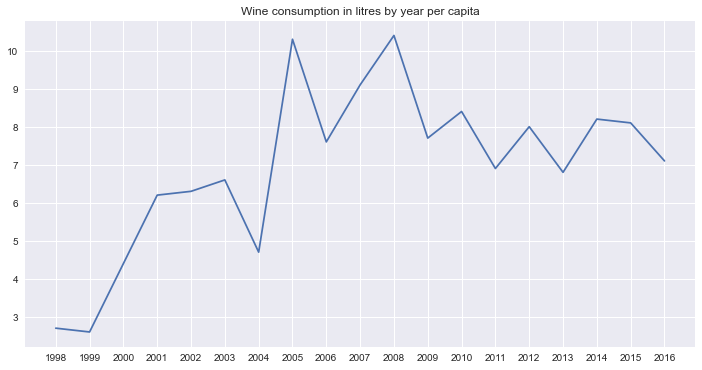

In [6]:
plt.figure(figsize=(12, 6))

plt.plot(saint_petersburg_df["year"], saint_petersburg_df["wine"])
plt.xticks(saint_petersburg_df.year.values)

plt.title("Wine consumption in litres by year per capita")
plt.show()

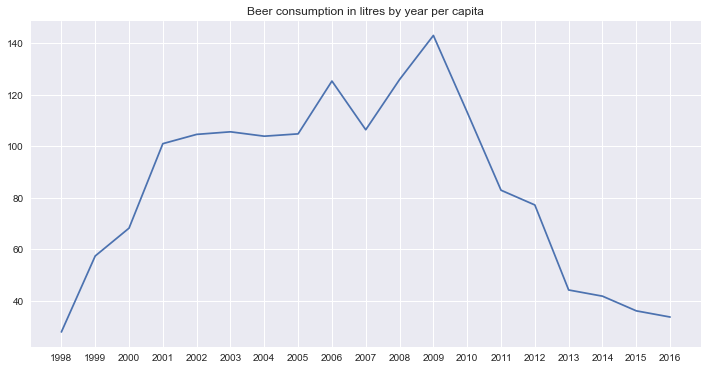

In [7]:
plt.figure(figsize=(12, 6))

plt.plot(saint_petersburg_df["year"], saint_petersburg_df["beer"])
plt.xticks(saint_petersburg_df.year.values)

plt.title("Beer consumption in litres by year per capita")
plt.show()

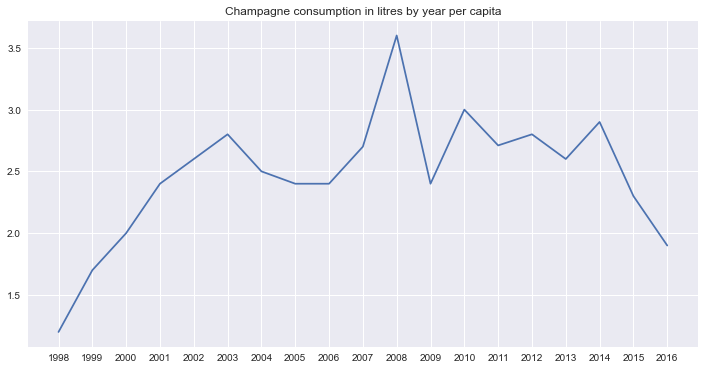

In [8]:
plt.figure(figsize=(12, 6))

plt.plot(saint_petersburg_df["year"], saint_petersburg_df["champagne"])
plt.xticks(saint_petersburg_df.year.values)

plt.title("Champagne consumption in litres by year per capita")
plt.show()